## Statystyka i Analiza danych
# Laboratorium 10 - Test $\chi^2$

### Ćwiczenie 1: 

Typowy rozkład wiekowy ludności w pewnym regionie jest zgodny z podanym w tabeli Typowe. Natomiast w tabeli Zaobserwowane przedstawiono rozkład wiekowy ludności z miasteczka znajdującego się w rozpatrywanym regionie. Sprawdź czy rozkład ten można uznać za zgodny z rozkładem typowym dla tego regionu.

In [1]:
kategorie <- c("<15", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", ">74")
Typowe <- c(475,304,182,190,208,170,111,72)
Zaobserwowane <- c(3016,2438,2037,2031,1253,977,585,163)

Sformułuj hipotezy zerową i alternatywną, zinterpretuj hipotezy. Przyjęty poziom istotności $\alpha = 0.01$.

In [2]:
# H0: rozkłady są takie same
# H1: rozkłady są różne
alpha <- 0.01

Oblicz liczbę stopni swobody:

In [3]:
# k - 1 stopni swobody
df <- length(kategorie) - 1
df

[1] 7

Oblicz tabelę wartości oczekiwanych:

In [5]:
Oczekiwane <- Typowe/sum(Typowe) * sum(Zaobserwowane)
Oczekiwane
# wszystkie wartości > 5

[1] 3468.1659 2219.6262 1328.8551 1387.2664 1518.6916 1241.2383  810.4556
[8]  525.7009

Oblicz wartość statystyki testowej:

In [7]:
chi2 <- sum((Zaobserwowane - Oczekiwane)^2/Oczekiwane)
chi2

[1] 1172.21

Wyznacz wartość krytyczną i podejmij decyzję.

In [9]:
qchisq(1 - alpha,df)
# odrzucamy H0 

[1] 18.47531

Wykonaj test korzystając z funkcji `chisq.test()`, podając jako pierwszy argument liczebności zaobserwowane, a jako parametr *p* -- odpowiadające im prawdopodobieństwa założone w hipotezie zerowej

In [10]:
chisq.test(Zaobserwowane, p=Oczekiwane/sum(Oczekiwane)) 
# wartości obliczone krok po kroku pokrywają się z wartościami obliczonymi przez test


	Chi-squared test for given probabilities

data:  Zaobserwowane
X-squared = 1172.2, df = 7, p-value < 2.2e-16


Czyścimy workspace:

In [11]:
rm(list = ls())

### Ćwiczenie 2

Dane do tego zadania opisują wszystkie osoby (2201) na pokładzie dużego statku wycieczkowego z punktu widzenia 3 prostych atrybutów jakościowych i pewnego rodzaju, nieznanego, jakościowego atrybutu decyzyjnego (zadowolenie z wycieczki? sympatia do kapitana? Co to są za dane?). Sporządź tabelę wielodzielczą i wykres. Wykonaj test niezależności chi-kwadrat dla atrybutów: płeć i wiek, klasa i decyzja.

In [34]:
Dane <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/11-cw2.csv"), sep=";")

Przyjmij poziom istotności 0.001:

In [13]:
alpha <- 0.001

Utwórz tablicę wielodzielczą dla atrybutów wiek i płeć korzystając z funkcji `table()`

In [17]:
WiekPlec <- table(Dane$Age, Dane$Sex)
WiekPlec

       
        Female Male
  Adult    402 1666
  Child     45   64

Stwórz wykres tablicy korzystając z funkcji `plot()`

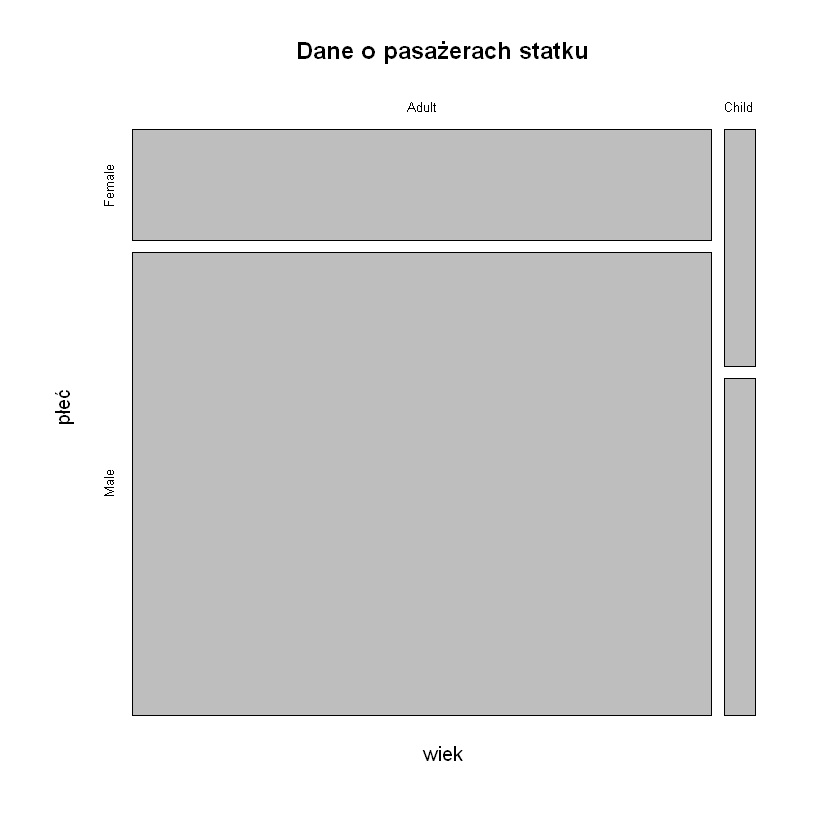

In [20]:
plot(WiekPlec, main="Dane o pasażerach statku", xlab="wiek", ylab="płeć")

Oblicz sumę obserwacji oraz liczebności brzegowe korzystając z funkcji `margin.table()` podając jako pierwszy argument tablicę wielodzielczą, jako drugi 1 dla wierszy a 2 dla kolumn

In [26]:
#?margin.table
margin_rows <- margin.table(WiekPlec, 1)
margin_rows # podział według wieku
margin_cols <- margin.table(WiekPlec, 2)
margin_cols # podział według płci
total <- sum(margin_cols)
total 


Adult Child 
 2068   109 


Female   Male 
   447   1730 

[1] 2177

Oblicz liczbę stopni swobody:

In [27]:
#(cols - 1)*(rows - 1)
df <- (length(margin_cols) - 1)*(length(margin_rows) -1)
df

[1] 1

Oblicz tablicę wartości oczekiwanych. Utwórz macierz korzystając z funkcji `outer(margin_rows, margin_cols)`, wykonującej iloczyn zewnętrzny/Kroneckera (iloczyny wszystkich kombinacji współrzędnych wektorów)

In [29]:
E <- outer(margin_rows, margin_cols)/total
E

,Female,Male
Adult,424.6192,1643.3808
Child,22.3808,86.6192


Oblicz wartość statystyki testowej:

In [30]:
chi2  <- sum((WiekPlec - E)^2/E)
chi2

[1] 30.28302

Podaj wartość krytyczną i podejmij decyzję odnośnie hipotezy zerowej:

In [31]:
qchisq(1 - alpha, df)
#odrzucamy H0

[1] 10.82757

Wykonaj test korzystając z funkcji `chisq.test()` podając jako argument tablicę wielodzielczą

In [32]:
chisq.test(WiekPlec, correct=FALSE) #bez poprawki Yatesa


	Pearson's Chi-squared test

data:  WiekPlec
X-squared = 30.283, df = 1, p-value = 3.734e-08


Wykonaj wszystkie powyższe czynności dla atrybutów klasa i decyzja. Tablica wielodzielcza:

In [36]:
KlasaDecyzja <- table(Dane$Class, Dane$Decision)
KlasaDecyzja

      
        NO YES
  1    122 203
  2    167 118
  3    528 178
  Crew 669 192

Wykres tablicy:

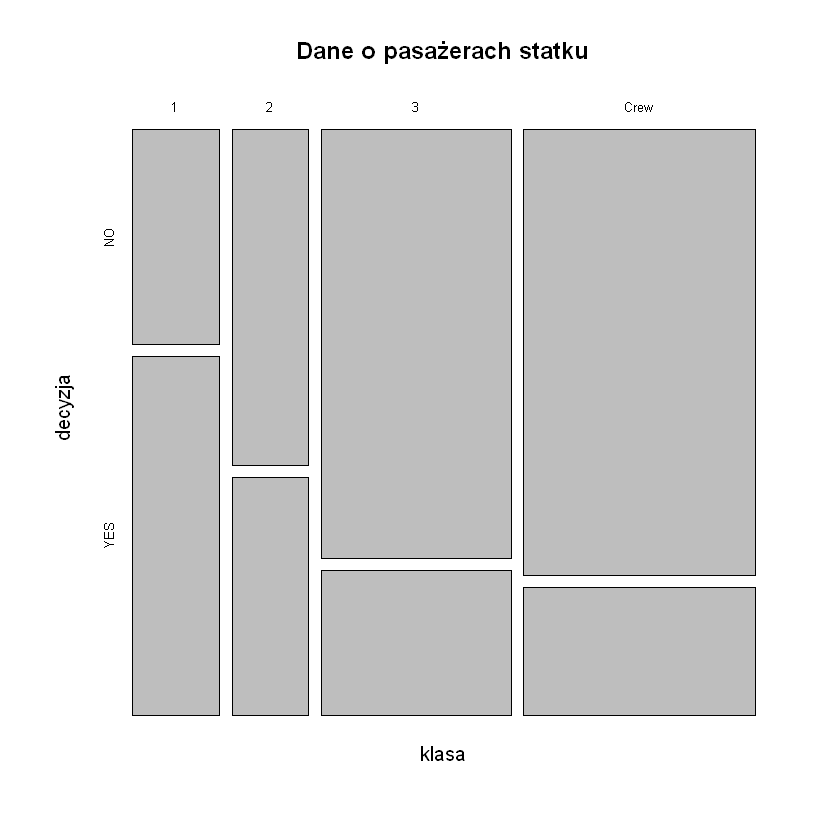

In [38]:
plot(KlasaDecyzja, main="Dane o pasażerach statku", xlab="klasa", ylab="decyzja")

Suma obserwacji oraz liczebności brzegowe: 

In [40]:
margin_rows <- margin.table(KlasaDecyzja, 1)
margin_rows #podział według klasy
margin_cols <- margin.table(KlasaDecyzja, 2)
margin_cols #podział według decyzji
total <- sum(margin_cols)
total


   1    2    3 Crew 
 325  285  706  861 


  NO  YES 
1486  691 

[1] 2177

Liczba stopni swobody:

In [42]:
#(cols - 1)(rows -1)
df <- (length(margin_cols)-1)*(length(margin_rows)-1)
df

[1] 3

Tablica wartości oczekiwanych:

In [43]:
E <- outer(margin_rows,margin_cols)/total
E

,NO,YES
1,221.8420,103.15802
2,194.5384,90.46164
3,481.9090,224.09095
Crew,587.7106,273.28939


Wartość statystyki testowej:

In [44]:
chi2  <- sum((KlasaDecyzja - E)^2/E)
chi2

[1] 203.16

Wartość krytyczna i decyzja:

In [45]:
qchisq(1 - alpha, df)
#Odrzucamy H0

[1] 16.26624

Test używając funkcji `chisq.test()`:

In [46]:
chisq.test(KlasaDecyzja, correct=FALSE) #bez poprawki Yatesa


	Pearson's Chi-squared test

data:  KlasaDecyzja
X-squared = 203.16, df = 3, p-value < 2.2e-16


Czyszczenie przestrzeni roboczej:

In [47]:
rm(list = ls())